In [9]:
import ipp
df = ipp.pd.read_csv('/Users/nikhilprao/Documents/Data/Boston.csv', index_col=0)
df.reset_index(drop=True)
desc = df.describe()
data_frames = []


In [10]:
desc

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [11]:
def plot_outliers(data):
    ipp.plt.figure(figsize=(15, 10))
    ipp.sns.boxplot(data=data)
    ipp.plt.title('Boxplots')
    ipp.plt.xticks(rotation=90)  # Rotate column names if necessary
    ipp.plt.show()

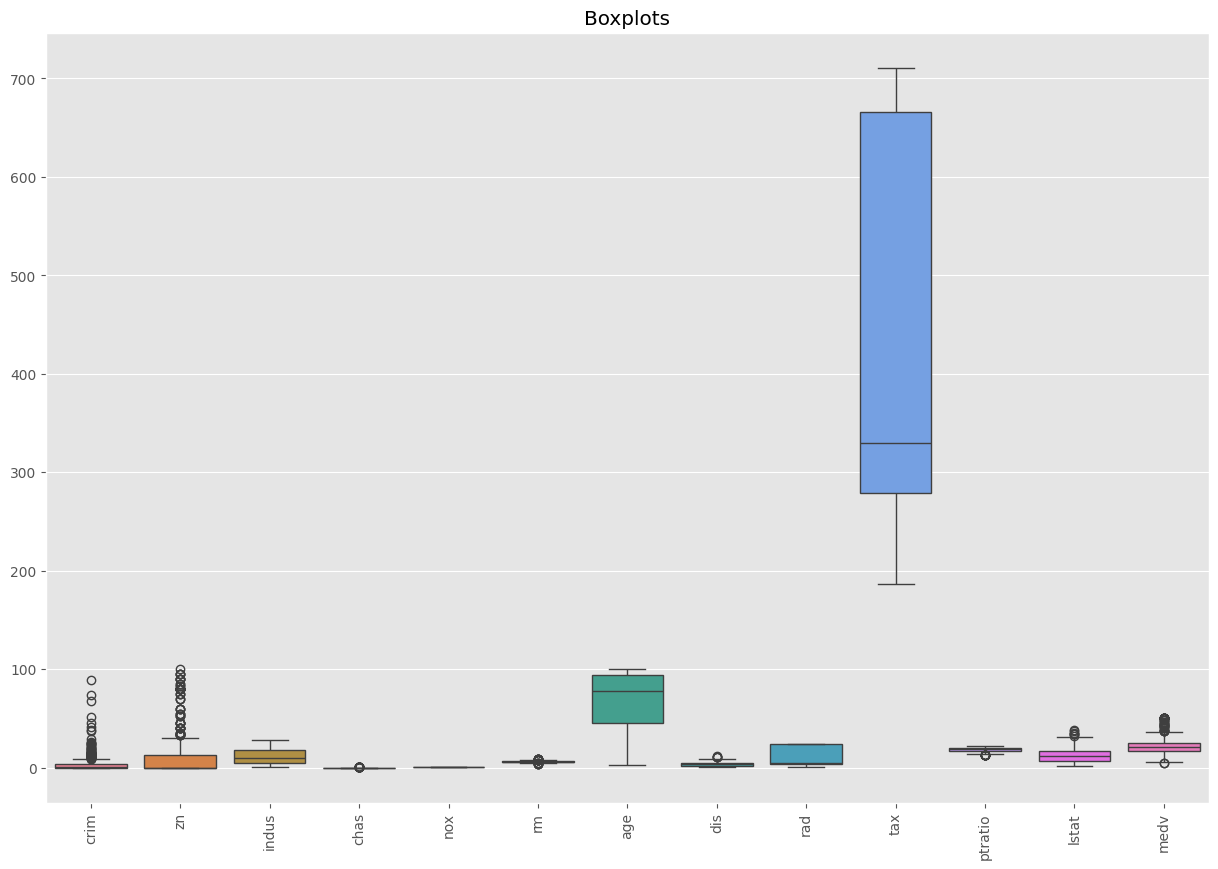

In [12]:
plot_outliers(df)

# IQR

In [13]:
# Assuming 'desc' is the result of df.describe()
Q1 = desc.loc['25%']
Q3 = desc.loc['75%']
IQR = Q3 - Q1

# Determine lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Initialize an empty DataFrame to store outliers
outliers = ipp.pd.DataFrame()

# Make a copy of the original DataFrame to work on
df_iqr_no_outliers = df.copy()

# Identify and collect outliers
for col in df.columns:
    # Identify outliers for the current column
    col_outliers = df_iqr_no_outliers[(df_iqr_no_outliers[col] < lower_bound[col]) | (df_iqr_no_outliers[col] > upper_bound[col])]
    
    # Append these outliers to the outliers DataFrame
    outliers = ipp.pd.concat([outliers, col_outliers])
    
    # Remove these outliers from the df_iqr_no_outliers DataFrame
    df_iqr_no_outliers = df_iqr_no_outliers.drop(col_outliers.index)

# Ensure no duplicate rows in the outliers DataFrame
outliers = outliers.drop_duplicates()
outliers_iqr = outliers
# Verify the results
print("Number of outliers detected:", len(outliers))
print("Number of rows after removing outliers:", len(df_iqr_no_outliers))

# Now 'outliers' contains all the outlier rows
# 'df_iqr_no_outliers' contains the DataFrame with outliers removed


Number of outliers detected: 197
Number of rows after removing outliers: 309


In [14]:
df_iqr_no_outliers

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


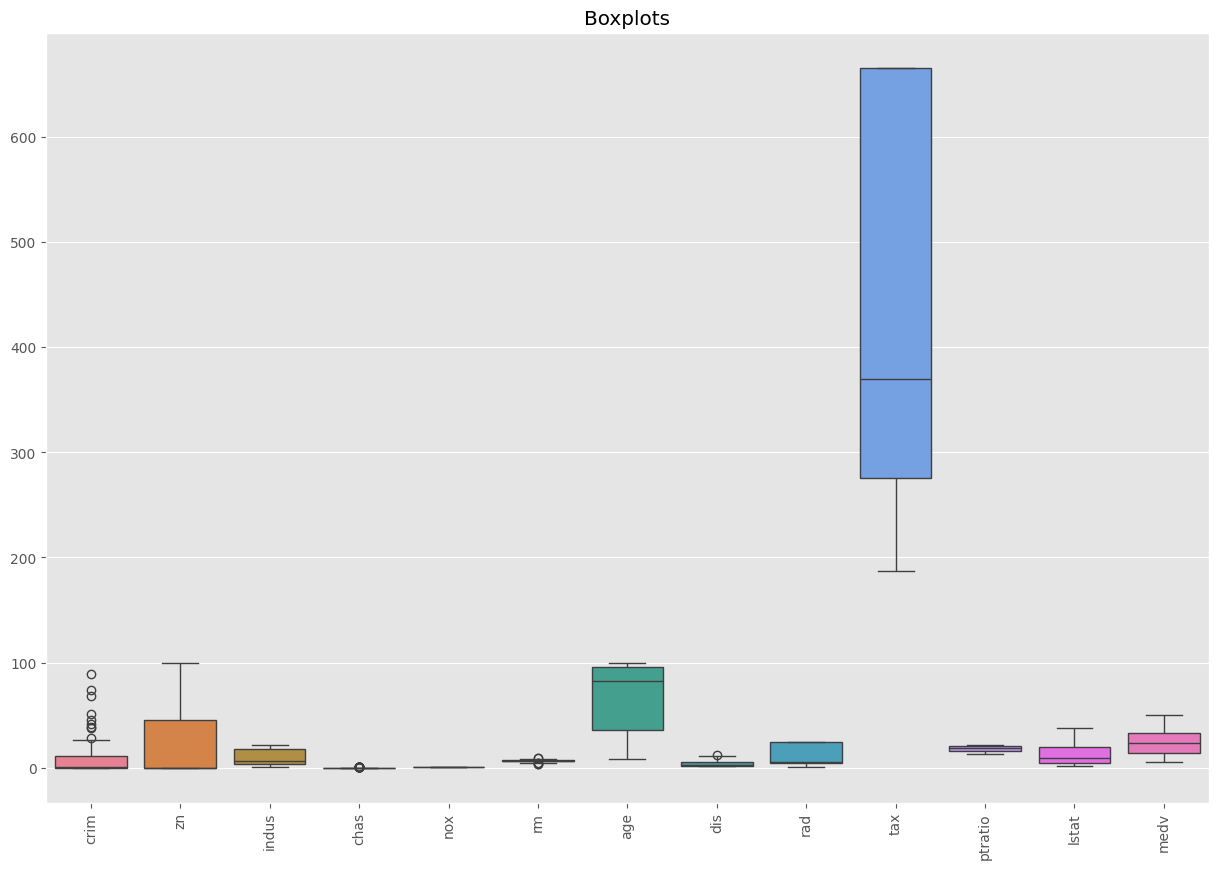

In [15]:
plot_outliers(outliers)
data_frames.append(('DataFrame Without Outliers IQR', df_iqr_no_outliers))

In [16]:
# data_frames

## histograms and fit normal distribution curves 

In [17]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.stats import norm
# import numpy as np

# # Example DataFrame (replace with your actual DataFrame)
# # df = your DataFrame

# # Plot histograms and fit normal distribution for each column
# for col in df.columns:
#     plt.figure(figsize=(10, 6))
#     plt.hist(df[col], bins=20, rwidth=0.8, density=True, alpha=0.6, color='g')
#     plt.xlabel(col)
#     plt.ylabel('Density')
#     plt.title(f'Histogram and Normal Distribution Fit for {col}')

#     rng = np.arange(df[col].min(), df[col].max(), 0.1)
#     plt.plot(rng, norm.pdf(rng, df[col].mean(), df[col].std()), 'r')
#     plt.show()


# SD

In [18]:
outliers = ipp.pd.DataFrame()

# Make a copy of the original DataFrame to work on
df_sd3_no_outliers = df.copy()

# Identify and remove outliers using the 3 standard deviations rule
for col in df.columns:
    if ipp.pd.api.types.is_numeric_dtype(df[col]):  # Ensure the column is numeric
        mean = df[col].mean()
        std_dev = df[col].std()
        lower_bound = mean - 3 * std_dev
        upper_bound = mean + 3 * std_dev
        
        # Identify outliers
        col_outliers = df_sd3_no_outliers[(df_sd3_no_outliers[col] < lower_bound) | (df_sd3_no_outliers[col] > upper_bound)]
        
        # Append these outliers to the outliers DataFrame
        outliers = ipp.pd.concat([outliers, col_outliers])
        
        # Remove these outliers from the df_sd3_no_outliers DataFrame
        df_sd3_no_outliers = df_sd3_no_outliers.drop(col_outliers.index)

# Ensure no duplicate rows in the outliers DataFrame
outliers = outliers.drop_duplicates()
outliers_sd3 = outliers
# Verify the results
print("Number of outliers detected:", len(outliers))
print("Number of rows after removing outliers:", len(df_sd3_no_outliers))

# Now 'outliers' contains all the outlier rows
# 'df_sd3_no_outliers' contains the DataFrame with outliers removed


Number of outliers detected: 70
Number of rows after removing outliers: 436


In [19]:
df_sd3_no_outliers
data_frames.append(('DataFrame Without Outliers SD3', df_sd3_no_outliers))

## SD 2

In [20]:
outliers = ipp.pd.DataFrame()

# Make a copy of the original DataFrame to work on
df_sd2_no_outliers = df.copy()

# Identify and remove outliers using the 3 standard deviations rule
for col in df.columns:
    if ipp.pd.api.types.is_numeric_dtype(df[col]):  # Ensure the column is numeric
        mean = df[col].mean()
        std_dev = df[col].std()
        lower_bound = mean - 2 * std_dev
        upper_bound = mean + 2 * std_dev
        
        # Identify outliers
        col_outliers = df_sd2_no_outliers[(df_sd2_no_outliers[col] < lower_bound) | (df_sd2_no_outliers[col] > upper_bound)]
        
        # Append these outliers to the outliers DataFrame
        outliers = ipp.pd.concat([outliers, col_outliers])
        
        # Remove these outliers from the df_sd2_no_outliers DataFrame
        df_sd2_no_outliers = df_sd2_no_outliers.drop(col_outliers.index)

# Ensure no duplicate rows in the outliers DataFrame
outliers = outliers.drop_duplicates()

# Verify the results
print("Number of outliers detected:", len(outliers))
print("Number of rows after removing outliers:", len(df_sd2_no_outliers))

# Now 'outliers' contains all the outlier rows
# 'df_sd2_no_outliers' contains the DataFrame with outliers removed


Number of outliers detected: 176
Number of rows after removing outliers: 330


In [21]:
df_sd2_no_outliers
data_frames.append(('DataFrame Without Outliers SD2', df_sd2_no_outliers))

# Z-Score

In [22]:
z_scores = df.apply(ipp.zscore)

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = (ipp.np.abs(z_scores) > threshold).any(axis=1)

# Create a DataFrame of outliers
outliers_df = df[outliers]
outliers_z = outliers_df
print(type(outliers_z))
# Create a DataFrame without outliers
df_z3_no_outliers = df[~outliers]

# Verify the results
print("Number of outliers detected:", outliers.sum())
print("Number of rows after removing outliers:", len(df_z3_no_outliers))

# Now 'outliers_df' contains all the outlier rows
# 'df_z3_no_outliers' contains the DataFrame with outliers removed


<class 'pandas.core.frame.DataFrame'>
Number of outliers detected: 70
Number of rows after removing outliers: 436


In [23]:
df_z3_no_outliers
data_frames.append(('DataFrame Without Outliers Z3', df_z3_no_outliers))

## Percentile

In [24]:
lower_percentile = 0.01
upper_percentile = 0.99

# Initialize an empty DataFrame to store outliers
outliers = ipp.pd.DataFrame()

# Make a copy of the original DataFrame to work on
df_per_no_outliers = df.copy()

# Identify and remove outliers using the percentile method
for col in df.columns:
    if ipp.pd.api.types.is_numeric_dtype(df[col]):  # Ensure the column is numeric
        lower_bound = df[col].quantile(lower_percentile)
        upper_bound = df[col].quantile(upper_percentile)
        
        # Identify outliers
        col_outliers = df_per_no_outliers[(df_per_no_outliers[col] < lower_bound) | (df_per_no_outliers[col] > upper_bound)]
        
        # Append these outliers to the outliers DataFrame
        outliers = ipp.pd.concat([outliers, col_outliers])
        
        # Remove these outliers from the df_per_no_outliers DataFrame
        df_per_no_outliers = df_per_no_outliers.drop(col_outliers.index)
        
# Ensure no duplicate rows in the outliers DataFrame
outliers = outliers.drop_duplicates()
outliers_percentile = outliers
# Verify the results
print("Number of outliers detected:", len(outliers))
print("Number of rows after removing outliers:", len(df_per_no_outliers))

# Now 'outliers' contains all the outlier rows
# 'df_per_no_outliers' contains the DataFrame with outliers removed


Number of outliers detected: 71
Number of rows after removing outliers: 435


In [25]:
data_frames.append(('DataFrame Without Outliers Percentile', df_per_no_outliers))

In [26]:
# results = [
#     ('Original DataFrame', df),
#     ('Z-Score Method - No Outliers', df_per_no_outliers),
#     ('IQR Method - No Outliers', df_iqr_no_outliers),
#     ('Percentile Method - No Outliers', df_per_no_outliers),
#     ('Z-Score Method - Outliers', outliers_z),
#     ('IQR Method - Outliers', outliers_iqr),
#     ('Percentile Method - Outliers', outliers_percentile)]

results = [
    ('Original DataFrame', df),
    ('Z-Score Method - No Outliers', df_per_no_outliers),
    ('IQR Method - No Outliers', df_iqr_no_outliers),
    ('Percentile Method - No Outliers', df_per_no_outliers)]

In [27]:
for description, df_result in results:
    print(f"\n{description}")
    print(df_result.describe())



Original DataFrame
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std    

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import zscore, ks_2samp
import matplotlib.pyplot as plt
from scipy.stats import norm

In [29]:
# Perform KS tests and plot histograms

ks_statistics = []
p_values = []
columns = []

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"\nColumn: {col}")
        original_data = df[col].dropna()
        
        for description, df_result in results[1:]:
            cleaned_data = df_result[col].dropna()

            # Perform KS test
            ks_stat, p_value = ks_2samp(original_data, cleaned_data)
            print(f"{description} - KS Statistic: {ks_stat}, P-Value: {p_value}")

            ks_statistics.append(ks_stat)
            p_values.append(p_value)
            columns.append(col)

            results_df_after = pd.DataFrame({
                'Column': columns,
                'KS Statistic': ks_statistics,
                'P-Value': p_values
            })

            # # Plot histograms and normal distribution fits
            # plt.figure(figsize=(10, 6))
            # plt.hist(cleaned_data, bins=20, rwidth=0.8, density=True, alpha=0.6, color='g', label='Cleaned Data')
            # plt.hist(original_data, bins=20, rwidth=0.8, density=True, alpha=0.6, color='b', label='Original Data')
            # plt.xlabel(col)
            # plt.ylabel('Density')
            # plt.title(f'{description} - Histogram and Normal Distribution Fit for {col}')
            
            # rng = np.arange(cleaned_data.min(), cleaned_data.max(), 0.1)
            # plt.plot(rng, norm.pdf(rng, cleaned_data.mean(), cleaned_data.std()), 'r', label='Cleaned Data Fit')
            # plt.plot(rng, norm.pdf(rng, original_data.mean(), original_data.std()), 'b', label='Original Data Fit')
            # plt.legend()
            # plt.show()


Column: crim
Z-Score Method - No Outliers - KS Statistic: 0.036545363681795465, P-Value: 0.8980364828965516
IQR Method - No Outliers - KS Statistic: 0.1324110671936759, P-Value: 0.002114254577599064
Percentile Method - No Outliers - KS Statistic: 0.036545363681795465, P-Value: 0.8980364828965516

Column: zn
Z-Score Method - No Outliers - KS Statistic: 0.04699014129298987, P-Value: 0.6563193498687536
IQR Method - No Outliers - KS Statistic: 0.13438735177865613, P-Value: 0.0017223935354066513
Percentile Method - No Outliers - KS Statistic: 0.04699014129298987, P-Value: 0.6563193498687536

Column: indus
Z-Score Method - No Outliers - KS Statistic: 0.04586343192040344, P-Value: 0.6853821284456999
IQR Method - No Outliers - KS Statistic: 0.11259705539992582, P-Value: 0.013951981695040241
Percentile Method - No Outliers - KS Statistic: 0.04586343192040344, P-Value: 0.6853821284456999

Column: chas
Z-Score Method - No Outliers - KS Statistic: 0.002503293807641634, P-Value: 1.0
IQR Method - N

In [30]:
from scipy.stats import kstest

# Initialize lists to store KS statistics and p-values
ks_statistics = []
p_values = []
columns = []


# for i in df.columns:
#     # print(df[i])
#     # Perform the one-sample KS test
#     print("")
#     ks_statistic, p_value = kstest(df[i], 'norm')
#     print(f"KS Statistic: {ks_statistic}")
#     print(f"P-Value: {p_value}")



# Perform the one-sample KS test for each column
for col in df.columns:
    ks_statistic, p_value = kstest(df[col], 'norm')
    ks_statistics.append(ks_statistic)
    p_values.append(p_value)
    columns.append(col)
    print(f"Column: {col}")
    print(f"KS Statistic: {ks_statistic}")
    print(f"P-Value: {p_value}")
    print("")

# Create a new DataFrame with KS statistics and p-values
results_df = pd.DataFrame({
    'Column': columns,
    'KS Statistic': ks_statistics,
    'P-Value': p_values
})

print(results_df.T.reset_index(drop=True))

Column: crim
KS Statistic: 0.5025212984276741
P-Value: 9.101764614072096e-119

Column: zn
KS Statistic: 0.5
P-Value: 1.6871111181943794e-117

Column: indus
KS Statistic: 0.9382587138709638
P-Value: 0.0

Column: chas
KS Statistic: 0.5
P-Value: 1.6871111181943794e-117

Column: nox
KS Statistic: 0.6498812922347244
P-Value: 2.7133228490861893e-209

Column: rm
KS Statistic: 0.9998152774582629
P-Value: 0.0

Column: age
KS Statistic: 0.998134186699616
P-Value: 0.0

Column: dis
KS Statistic: 0.8921293224701715
P-Value: 0.0

Column: rad
KS Statistic: 0.937724176352216
P-Value: 0.0

Column: tax
KS Statistic: 1.0
P-Value: 0.0

Column: ptratio
KS Statistic: 1.0
P-Value: 0.0

Column: lstat
KS Statistic: 0.9900425026651394
P-Value: 0.0

Column: medv
KS Statistic: 0.9999997133484281
P-Value: 0.0

         0    1         2     3         4         5         6         7   \
0      crim   zn     indus  chas       nox        rm       age       dis   
1  0.502521  0.5  0.938259   0.5  0.649881  0.999815  0

In [ ]:
import numpy as np
from scipy.stats import norm, kstest

# Step 1: Generate a sample from a normal distribution
np.random.seed(42)
sample_size = 100
mean = 0
std_dev = 1
sample = np.random.normal(mean, std_dev, sample_size)

# Step 2: Compute the Empirical Distribution Function (EDF)
def empirical_distribution_function(x, data):
	return np.sum(data <= x) / len(data)
edf_values = [empirical_distribution_function(x, sample) for x in sample]

# Step 3: Define the Reference Distribution
reference_cdf = norm.cdf(sample)

# Step 4: Calculate the Kolmogorov–Smirnov Statistic
ks_statistic, ks_p_value = kstest(sample, 'norm')

# Step 5: Comparing
alpha = 0.05
critical_value = 1.36 # This value can be obtained from the Kolmogorov-Smirnov table for a specific significance level

print(f"Kolmogorov-Smirnov Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")

if ks_statistic > critical_value or ks_p_value < alpha:
	print("Reject the null hypothesis. The sample does not come from the specified distribution.")
else:
	print("Fail to reject the null hypothesis. The sample comes from the specified distribution.")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the outliers detected by each method are stored in:
# outliers_iqr, outliers_sd3, outliers_z_df, outliers_percentile

# Create a summary DataFrame to count outliers detected by each method
summary = ipp.pd.DataFrame({
    'Method': ['IQR', '3 SD', 'Z-Score', 'Percentile'],
    'Outliers Count': [
        len(outliers_iqr),
        len(outliers_sd3),
        len(outliers_z),
        len(outliers_percentile)
    ]
})

print(summary)

# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Method', y='Outliers Count', data=summary)
plt.title('Comparison of Outliers Detected by Different Methods')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_rel

# Assuming df is your DataFrame and 'medv' is the column you're predicting
X = df.drop('medv', axis=1)
y = df['medv']

# Helper function to evaluate model performance
def evaluate_model(X, y):
    model = LinearRegression()
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    return np.sqrt(-scores).mean()

# Original data without outlier removal
mse_original = evaluate_model(X, y)

# IQR method
mse_iqr = evaluate_model(df_iqr_no_outliers.drop('medv', axis=1), df_iqr_no_outliers['medv'])

# 3 Standard Deviations method
mse_sd3 = evaluate_model(df_sd3_no_outliers.drop('medv', axis=1), df_sd3_no_outliers['medv'])

# Z-Score method
mse_zscore = evaluate_model(df_z3_no_outliers.drop('medv', axis=1), df_z3_no_outliers['medv'])

# Percentile method
mse_percentile = evaluate_model(df_per_no_outliers.drop('medv', axis=1), df_per_no_outliers['medv'])

# Collect results
results = pd.DataFrame({
    'Method': ['Original', 'IQR', '3 SD', 'Z-Score', 'Percentile'],
    'MSE': [mse_original, mse_iqr, mse_sd3, mse_zscore, mse_percentile]
})

print(results)

In [ ]:
# Paired t-tests to compare methods
population_mean = 309  
from scipy.stats import ttest_1samp
t_statistic, p_value = ttest_1samp(df_iqr_no_outliers['medv'], population_mean)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Working

In [2]:
import ipp
df = ipp.pd.read_csv('/Users/nikhilprao/Documents/Data/Boston.csv', index_col=0)
df.reset_index(drop=True)
desc = df.describe()

In [5]:
# Create a pipeline for each method
pipeline_iqr = ipp.Pipeline([
    ('outlier_remover', ipp.OutlierRemover(method='iqr'))
])

pipeline_sd3 = ipp.Pipeline([
    ('outlier_remover', ipp.OutlierRemover(method='sd3'))
])

pipeline_zscore = ipp.Pipeline([
    ('outlier_remover', ipp.OutlierRemover(method='zscore'))
])

pipeline_percentile = ipp.Pipeline([
    ('outlier_remover', ipp.OutlierRemover(method='percentile'))
])

In [6]:
# Apply the pipelines to your DataFrame
df_iqr_no_outliers = pipeline_iqr.fit_transform(df)
df_sd3_no_outliers = pipeline_sd3.fit_transform(df)
df_z3_no_outliers = pipeline_zscore.fit_transform(df)
df_per_no_outliers = pipeline_percentile.fit_transform(df)

# Output the results
print("IQR Method:")
print("Number of outliers detected:", len(df)-len(df_iqr_no_outliers))
print("Number of rows after removing outliers:", len(df_iqr_no_outliers))

print("\n3 Standard Deviations Method:")
print("Number of outliers detected:", len(df)-len(df_sd3_no_outliers))
print("Number of rows after removing outliers:", len(df_sd3_no_outliers))

print("\nZ-Score Method:")
print("Number of outliers detected:", len(df)-len(df_z3_no_outliers))
print("Number of rows after removing outliers:", len(df_z3_no_outliers))

print("\nPercentile Method:")
print("Number of outliers detected:", len(df)-len(df_per_no_outliers))
print("Number of rows after removing outliers:", len(df_per_no_outliers))


IQR Method:
Number of outliers detected: 197
Number of rows after removing outliers: 309

3 Standard Deviations Method:
Number of outliers detected: 70
Number of rows after removing outliers: 436

Z-Score Method:
Number of outliers detected: 70
Number of rows after removing outliers: 436

Percentile Method:
Number of outliers detected: 71
Number of rows after removing outliers: 435


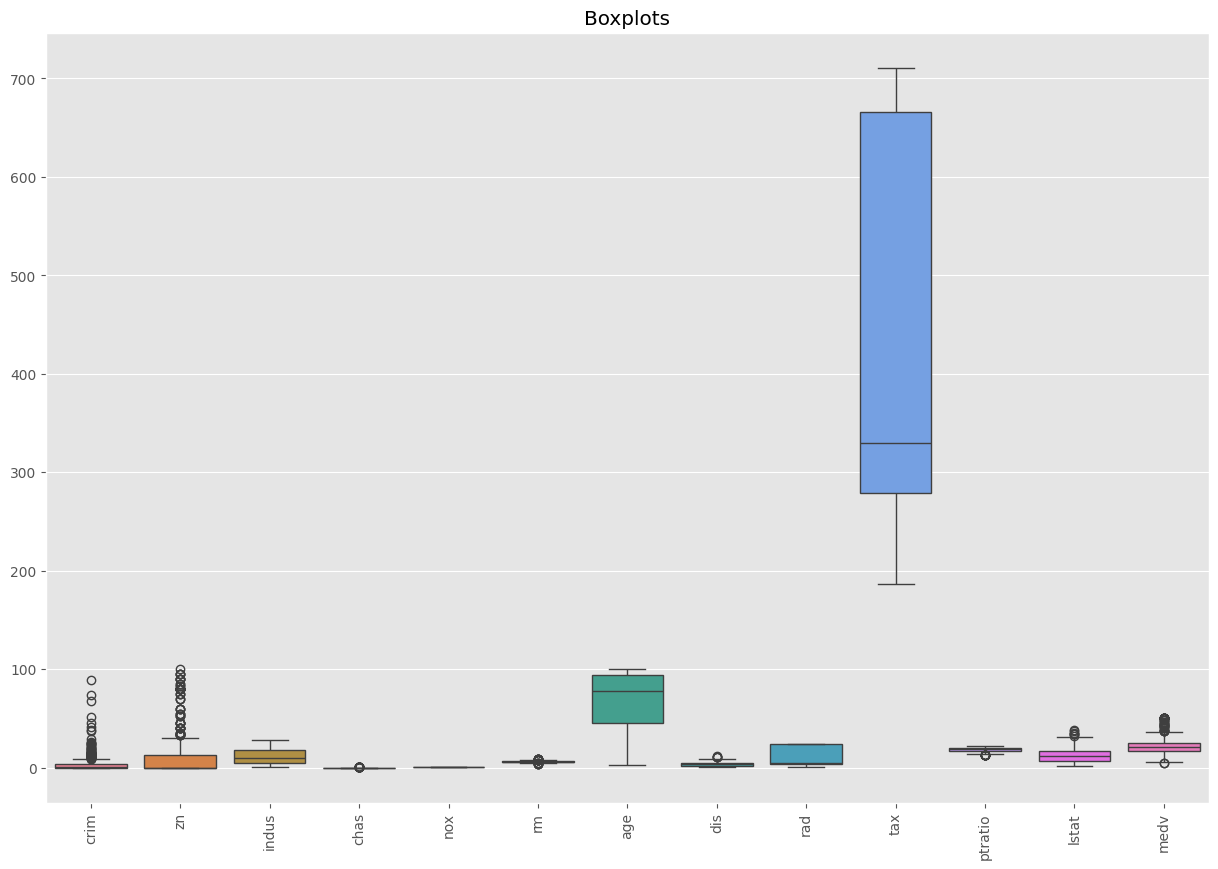

In [3]:
ipp.plot_outliers(df)

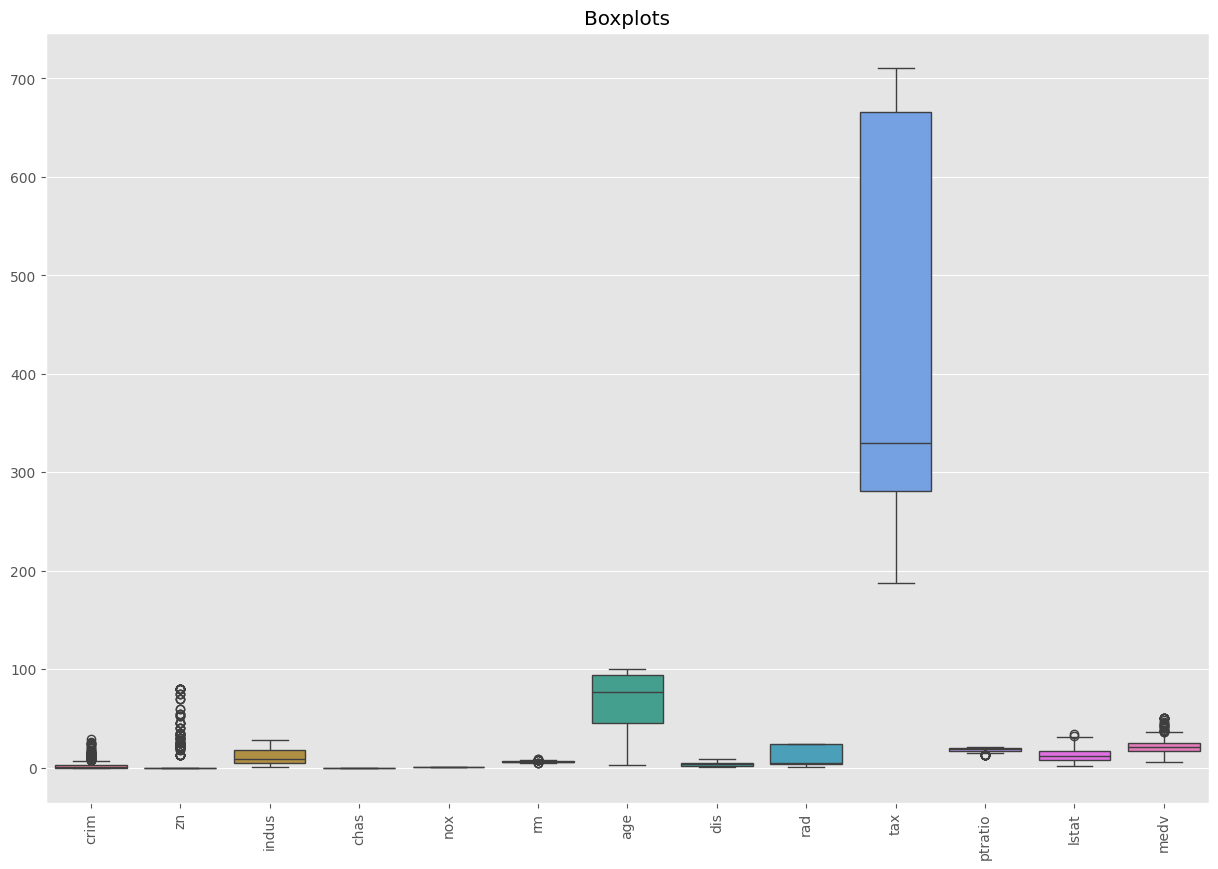

In [7]:
ipp.plot_outliers(df_z3_no_outliers)

In [31]:
# Collect the number of rows after removing outliers
rows_after_removal = {
    'iqr': len(df_iqr_no_outliers),
    'sd3': len(df_sd3_no_outliers),
    'zscore': len(df_z3_no_outliers),
    'percentile': len(df_per_no_outliers)
}

# Find the median value
median_rows = np.median(list(rows_after_removal.values()))

# Find the method that has the number of rows closest to the median
chosen_method = min(rows_after_removal, key=lambda k: abs(rows_after_removal[k] - median_rows))

print(f"\nChosen method: {chosen_method}")
print(f"Number of rows after removing outliers using {chosen_method} method: {rows_after_removal[chosen_method]}")



Chosen method: sd3
Number of rows after removing outliers using sd3 method: 436


In [32]:
median_rows

435.5

In [33]:
chosen_method

'sd3'

In [35]:
type(rows_after_removal)

dict